# Lab 10 Bike Trip Visualization

## PSU DS 200 Fall 2020

### Instructor: Professor John Yen
### TA: Rupesh Prajapati
### LA: Nathan Tack

## Acknnowledgement: 
This lab is a modified version of a lab of UC Berkeley data 8 course.

## Total 8 Exercises:
- Exercise 1: 5 points
- Exercies 2: 5 points
- Exercise 3: 5 points
- Exercise 4: 10 points
- Exercise 5: 5 points
- Exercise 6: 5 points
- Exercise 7: 10 points
- Exercise 8: 10 points

## Total 55 points

## Due: 5 pm Nov 9th

# Learning Objectives of the Lab
- Be able to generate a visualization of data involving spatial components (latitude, longitude). 
- Be able to use join to integrate relevant information in two tables.
- Be able to use color to represent a property of a spatial object.
- Be able to use radias to represent a numeric attribute of a spatial object.

## Acknowledgement: 
This lab is based on materials from db 8 developed at University of California, Berkeley.  The lab also benefited from an adaptation made by Penn State Professor Dave Hunter and his Teaching Assistant for DS 200.

In [ ]:
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


# Mount Google Drive

Like previous labs, we need to first mount the Google Drive in Colab before we can read data from Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Copy Data Files into DS200Labs in your Google Drive

Like the previous labs, download the following data files from Canvas, upload them to DS200Labs in your Google Drive.
- station.csv
- trip.csv

After you have done this, run the following "ls" command to make sure these data files is in your DS200Labs directory.  If not, carefully repeat the steps in uploading the file to DS200Labs (review these steps in Lab 1 if needed)

In [ ]:
!ls /content/drive/My\ Drive/DS200Labs

BC_10_2					  IMDB5000movies.csv
BC_10_2.pdf				  player_data.csv
Ben-NE-9-10-2015-pass-6.csv		  salary_data.csv
Ben_Pass_5_2				  SFSalaries2011_2014.csv
Ben_Pass_5_2.pdf			  station.csv
breast-cancer-wisconsin-data-windCSV.csv  trip.csv
BreatCancerFinal.csv			  Tweets
faithful.csv


# Read Data from DS200Labs in your Google Drive using Table.read_table

Like the previous labs, we read the data files needed for the lab from DS200Labs folder in your Google Drive.  We store the data in trip.csv into a table called trips.  We store the data in station.csv into a table called stations.

The trip.csv file contains bike sharing trips in Bay Area (California) with the following information:
- Trip ID: A unique ID for each bike sharing trip.
- Duration: The duration (in seconds) of the bike sharing events.
- Start Date: The date for which each bike sharing event starts.
- Start Station: The bike sharing station that starts the trip.
- Start Terminal: The ID of the start station.
- End Date: The date for which the bike sharing event ends.
- End Station: The bike sharing station that ends the trip.
- End Terminal: The ID of the end station.
- Bike #: The ID of the bike being rented.
- Subscriber Type: The type of bike renter can be a Subscriber (e.g., commuters) or a Customer (e.g., tourists)
- Zip Code: Zip code of the bike renter.

In [ ]:
path1= "/content/drive/My Drive/DS200Labs/trip.csv"
trips = Table.read_table(path1)
path2 = '/content/drive/My Drive/DS200Labs/station.csv'
stations = Table.read_table(path2)
trips.show(10)
stations.show(10)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


station_id,name,lat,long,dockcount,landmark,installation
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


# Bike Sharing Station Data
- station_id: The unique ID for each bike sharing station.
- name: The name of the bike sharing station.
- lat: The latitude of the bike sharing station.
- long: The longitude of the bike sharing station.
- dockcount: The number of bike docks at the station.
- landmark: The city of the bike sharing station.
- installation: The date the station was installed.


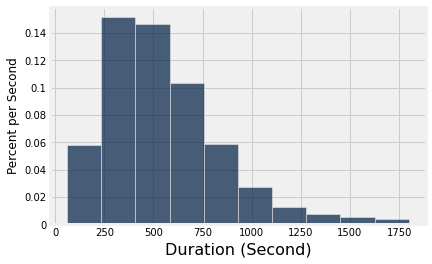

In [ ]:
commute = trips.where('Duration', are.below(1800))
commute.hist('Duration', unit='Second')

## Changing The Number of Bins in a Histogram

The parameter bins of the histogram method for Tables:
```
Tables.hist
```
specifies the number of bins in a histogram. The larger is the number of bins, the more detailted can we visualize the distribution.

# Exercise 1 (5 points)
Specify the number of bins (choose a number larger than 10) for the histogram of the duration of bike share trips.

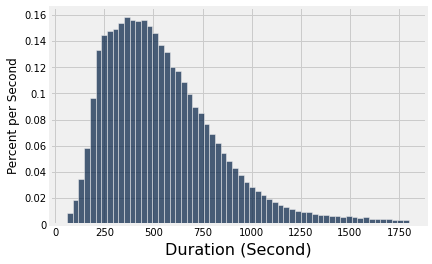

In [ ]:
commute.hist('Duration', bins=60, unit='Second')

# Exercise 2 (5 points)
Group the short bike trips by their Start Station, and sort the count in descending order.

In [ ]:
starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


# Exercise 3 (5 points)

Find the top 4 most popular start locations of bike sharing trips. Describe your hypotheses why these four start locations have the highest number of short (under 30 minutes) bike sharing trips.

# Answer to Exercise 3: 
The top 4 most popular start locations are San Francisco Caltrain (Townsend at 4th), San Francisco Caltrain 2 (330 Townsend), Harry Bridges Plaza (Ferry Building), Temporary Transbay Terminal (Howard at Beale). These places are the transport stations for the long distance trips, so people can ride bikes from home to station, then use other transports to go to work.

# Popular Start Location for Bike Share in SF

The top two start locations of SF bike sharing are Caltrain stations. The third top location is the Ferry Building. 

Suppose we want to find common pairs of start and end locations for SF bike sharing activities, we can group the data on multiple columns.

In [ ]:
paths_count = commute.group(['Start Station', 'End Station']).sort('count', descending=True)

In [ ]:
paths_count.show(10)

Start Station,End Station,count
San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,3737
2nd at Townsend,Harry Bridges Plaza (Ferry Building),2947
Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,2729
Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),2723
Harry Bridges Plaza (Ferry Building),2nd at Townsend,2607
Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),2428
Steuart at Market,2nd at Townsend,2349
Embarcadero at Sansome,Steuart at Market,2302
Townsend at 7th,San Francisco Caltrain (Townsend at 4th),2187
Temporary Transbay Terminal (Howard at Beale),San Francisco Caltrain (Townsend at 4th),2180


# Visualization of Spatial Data

We use folium python module for creating maps that show data that has a spatial component (e.g., longitude and latitude)

In [ ]:
import folium

# Exercise 4 (10 points)
Complete the code by specifying the column names corresponding to the latitude and the longitude of the bike sharing station tables (i.e., stations Table created by reading the station.csv file).  The code uses
folium to display locations of these stations on a map (of Bay Area). You can zoom in or out of the map. If you do not specify min_zoom and max_zoom parameters, the map can zoom in into too small a region (a few blocks) or zoom out to a too large area (e.g., the whole earth). Specify the min_zoom and max_zoom parameters so that you can control the range the map zoom in and out. You will need to specify these two parameters in Exercise 5 and 8 too.

In [ ]:
BayAreaMap = folium.Map(location=[37.34, -121.9], tiles="OpenStreetMap", zoom_start=8, min_zoom= 7, max_zoom=12, width='100%', height='100%')
for i in np.arange(stations.num_rows):
  latitude = stations.column('lat')[i]
  longitude = stations.column('long')[i]
  LatLonLocation = [latitude, longitude]
  label = stations.column('name')[i]
  folium.Marker(LatLonLocation, popup=label).add_to(BayAreaMap)
BayAreaMap

In [ ]:
sf = stations.where('landmark', are.equal_to('San Francisco'))
sf.show(10)

station_id,name,lat,long,dockcount,landmark,installation
41,Clay at Battery,37.795,-122.4,15,San Francisco,8/19/2013
42,Davis at Jackson,37.7973,-122.398,15,San Francisco,8/19/2013
45,Commercial at Montgomery,37.7942,-122.403,15,San Francisco,8/19/2013
46,Washington at Kearney,37.7954,-122.405,15,San Francisco,8/19/2013
47,Post at Kearney,37.789,-122.403,19,San Francisco,8/19/2013
48,Embarcadero at Vallejo,37.8,-122.399,15,San Francisco,8/19/2013
49,Spear at Folsom,37.7903,-122.391,19,San Francisco,8/20/2013
50,Harry Bridges Plaza (Ferry Building),37.7954,-122.394,23,San Francisco,8/20/2013
51,Embarcadero at Folsom,37.7915,-122.391,19,San Francisco,8/20/2013
39,Powell Street BART,37.7839,-122.408,19,San Francisco,8/25/2013


# Associating Different Cities with Different Colors

The following code first group bike sharing stations by their city (which was stored under the landmark column).  It also change the column name 'landmark' into a new, and more informative column name 'city'.

In [ ]:
cities = stations.group('landmark').relabeled('landmark', 'city')
cities

city,count
Mountain View,7
Palo Alto,5
Redwood City,7
San Francisco,35
San Jose,16


The following cell adds a new column that assigns a color to each city.  The function make_array returns an array of color.  The array provides the value of the new 'color' column for each row (i.e., each city).  

In [ ]:
city_colors = cities.with_column('color', make_array('blue','red','green','orange','purple'))
city_colors

city,count,color
Mountain View,7,blue
Palo Alto,5,red
Redwood City,7,green
San Francisco,35,orange
San Jose,16,purple


# Exercise 5 (5 points)
Complete the following code to plot all San Francisco stations with a color of your choice. You can choose one of the following colors: 'beige', 'black', 'blue', 'cadetblue', 'darkblue', 'darkgreen', 'darkpurple', 'darkred', 'gray', 'green', 'lightblue', 'lightgray', 'lightgreen', 'lightred', 'orange', 'pink', 'purple', 'red', 'white'

In [ ]:
SFMap = folium.Map(location=[37.8, -122.4], tiles="OpenStreetMap", zoom_start=13, min_zoom = 11, max_zoom=16, width='100%', height='100%')
for i in np.arange(sf.num_rows):
  folium.Circle([sf.column('lat')[i], sf.column('long')[i]], popup=sf.column('name')[i], color='orange', radius=200).add_to(SFMap)
SFMap







# Associate Diffferent Cities with Different Colors

It is desirable to visualize the popularity of start stations through the size of their circles, and to identify the city of bike sharing stations through a color assigned to the city.  To do this, we need to 
- First, compute the total number of trips that start at each bike sharing station.
- Second, add the name of the city by joining the start station count table with the 'stations' table (created by reading the station.csv file in the beginning of this notebook). We will refer to this table as 
```
trips_start_total_city
```
- Third, add the color of the city to the table above by joining the table with the city_colors table created earlier in this notebook.

In [ ]:
trips_start_total = trips.group('Start Station').sort('count', descending=True)
trips_start_total.show(10)

Start Station,count
San Francisco Caltrain (Townsend at 4th),26304
San Francisco Caltrain 2 (330 Townsend),21758
Harry Bridges Plaza (Ferry Building),17255
Temporary Transbay Terminal (Howard at Beale),14436
Embarcadero at Sansome,14158
2nd at Townsend,14026
Townsend at 7th,13752
Steuart at Market,13687
Market at 10th,11885
Market at Sansome,11431


In [ ]:
trips_start_total_city = trips_start_total.join('Start Station', stations, 'name')
trips_start_total_city.show(10)

Start Station,count,station_id,lat,long,dockcount,landmark,installation
2nd at Folsom,7999,62,37.7853,-122.396,19,San Francisco,8/22/2013
2nd at South Park,9469,64,37.7823,-122.393,15,San Francisco,8/22/2013
2nd at Townsend,14026,61,37.7805,-122.39,27,San Francisco,8/22/2013
5th at Howard,7708,57,37.7818,-122.405,15,San Francisco,8/21/2013
Adobe on Almaden,562,5,37.3314,-121.893,19,San Jose,8/5/2013
Arena Green / SAP Center,647,14,37.3327,-121.9,19,San Jose,8/5/2013
Beale at Market,8359,56,37.7923,-122.397,19,San Francisco,8/20/2013
Broadway St at Battery St,7676,82,37.7985,-122.401,15,San Francisco,1/22/2014
California Ave Caltrain Station,400,36,37.4291,-122.143,15,Palo Alto,8/14/2013
Castro Street and El Camino Real,1230,32,37.386,-122.084,11,Mountain View,12/31/2013


# Exercise 6 (5 points)
Complete the code below to join the table above with the city_colors table so that each station is associated with the color corresponding to the city it belongs to.

In [ ]:
trips_start_total_city_colored = trips_start_total_city.join('landmark', city_colors, 'city')
trips_start_total_city_colored

landmark,Start Station,count,station_id,lat,long,dockcount,installation,count_2,color
Mountain View,Castro Street and El Camino Real,1230,32,37.386,-122.084,11,12/31/2013,7,blue
Mountain View,Evelyn Park and Ride,978,30,37.3903,-122.067,15,8/16/2013,7,blue
Mountain View,Mountain View Caltrain Station,3580,28,37.3944,-122.077,23,8/15/2013,7,blue
Mountain View,Mountain View City Hall,1583,27,37.3892,-122.082,15,8/16/2013,7,blue
Mountain View,Rengstorff Avenue / California Street,501,33,37.4002,-122.099,15,8/16/2013,7,blue
Mountain View,San Antonio Caltrain Station,1058,29,37.4069,-122.107,23,8/15/2013,7,blue
Mountain View,San Antonio Shopping Center,1069,31,37.4004,-122.108,15,12/31/2013,7,blue
Palo Alto,California Ave Caltrain Station,400,36,37.4291,-122.143,15,8/14/2013,5,red
Palo Alto,Cowper at University,576,37,37.4486,-122.16,11,8/14/2013,5,red
Palo Alto,Palo Alto Caltrain Station,1116,34,37.444,-122.165,23,8/14/2013,5,red


# Exercise 7 (10 points)

Complete the code below to use the square root of each bike renting station's counts (i.e., the frequency of bike renting events starting at the station) as the radius of the circle on the map. Adjust the multiplier (an integer from 2 to 10) to choose one that you prefer.

In [ ]:
multiplier = 3
rad = pow(trips_start_total_city_colored.column('count'), 0.5) # Take the square root of counts
trips_start_total_city_colored2 = trips_start_total_city_colored.with_column('radius', rad * multiplier) 
trips_start_total_city_colored2.show(10)

landmark,Start Station,count,station_id,lat,long,dockcount,installation,count_2,color,radius
Mountain View,Castro Street and El Camino Real,1230,32,37.386,-122.084,11,12/31/2013,7,blue,105.214
Mountain View,Evelyn Park and Ride,978,30,37.3903,-122.067,15,8/16/2013,7,blue,93.819
Mountain View,Mountain View Caltrain Station,3580,28,37.3944,-122.077,23,8/15/2013,7,blue,179.499
Mountain View,Mountain View City Hall,1583,27,37.3892,-122.082,15,8/16/2013,7,blue,119.361
Mountain View,Rengstorff Avenue / California Street,501,33,37.4002,-122.099,15,8/16/2013,7,blue,67.1491
Mountain View,San Antonio Caltrain Station,1058,29,37.4069,-122.107,23,8/15/2013,7,blue,97.5807
Mountain View,San Antonio Shopping Center,1069,31,37.4004,-122.108,15,12/31/2013,7,blue,98.0867
Palo Alto,California Ave Caltrain Station,400,36,37.4291,-122.143,15,8/14/2013,5,red,60
Palo Alto,Cowper at University,576,37,37.4486,-122.16,11,8/14/2013,5,red,72
Palo Alto,Palo Alto Caltrain Station,1116,34,37.444,-122.165,23,8/14/2013,5,red,100.22


# Exercise 8 (10 points)
Complete the following code for displaying bike renting start stations in Bay Area by specifying the columns of the table above for color and radius.

In [ ]:
starts_map_data = trips_start_total_city_colored2
MyMap = folium.Map(location=[37.8, -122.4], tiles="OpenStreetMap", zoom_start=9, min_zoom=7, max_zoom=14, width='100%', height='100%')
for i in np.arange(starts_map_data.num_rows):
  folium.Circle([starts_map_data.column('lat')[i], 
                 starts_map_data.column('long')[i]], 
                popup=starts_map_data.column('Start Station')[i], 
                color=starts_map_data.column('color')[i], 
                radius=starts_map_data.column('radius')[i],
                fill=True).add_to(MyMap)
MyMap